In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
imageList = os.listdir('./images')
image=[]
for i in range(len(imageList)):
    image.append(Image.open('./images/'+imageList[i]))

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.layers import Dense, Dropout, Flatten, Input, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array 
from keras import regularizers
from keras import optimizers
from keras.models import load_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from PIL import ImageFile

In [3]:
import json
with open('labels.json', 'r') as f:
    labels = json.load(f)

In [4]:
import pandas as pd
labeldict=dict(labels)
dataset=pd.DataFrame()
dataset['index']=imageList[0:1500]
dataset['label']=dataset['index'].map(labeldict)
dataset.head()

,index,label
0,10058_right.jpeg,0
1,10100_right.jpeg,0
2,10120_right.jpeg,2
3,10150_right.jpeg,1
4,10156_left.jpeg,2


In [6]:
from PIL import Image, ImageEnhance
image_en=[]
for i in range(len(image)):
    contrast_enhancer = ImageEnhance.Contrast(image[i])
    eye_enhanced_image = contrast_enhancer.enhance(2)
    enhanced_image = np.asarray(eye_enhanced_image)
    b,g,r  = cv2.split(enhanced_image)
    enhanced_image = cv2.merge([b, g, r])
    image_en.append(enhanced_image)

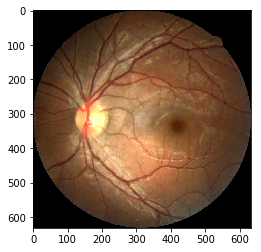

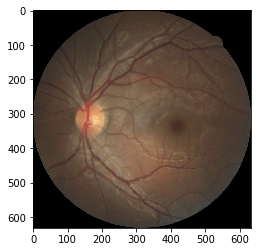

In [7]:
plt.figure()
imgplot = plt.imshow(image_en[1293])
plt.show()
plt.figure()
imgplot = plt.imshow(image[1293])
plt.show()

In [8]:
I_array=[]
for im in image_en:
    I_array.append(np.array(im))

In [9]:
for i in range(len(I_array)):
    I_array[i] = cv2.resize((I_array[i]), (512,512), interpolation=cv2.INTER_CUBIC)

In [10]:
immatrix=[]
for i in range(len(I_array)):
    img_gray = cv2.cvtColor(I_array[i], cv2.COLOR_BGR2GRAY)
    equ = cv2.equalizeHist(img_gray) 
    immatrix.append(np.array(equ).flatten())

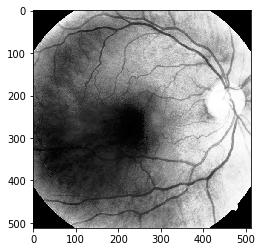

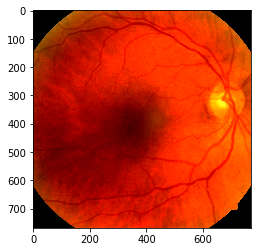

In [11]:
np.shape(immatrix)
np.shape(equ)
plt.imshow(immatrix[229].reshape((512,512)),cmap='gray')
plt.show()
plt.figure()
imgplot = plt.imshow(image_en[229])
plt.show()

In [12]:
dataset['image']=immatrix

In [17]:
import sklearn.model_selection

train, test = sklearn.model_selection.train_test_split(
    dataset, train_size=0.8, test_size=0.2, random_state=42)

New Data Size: 1000 Old Size: 1200


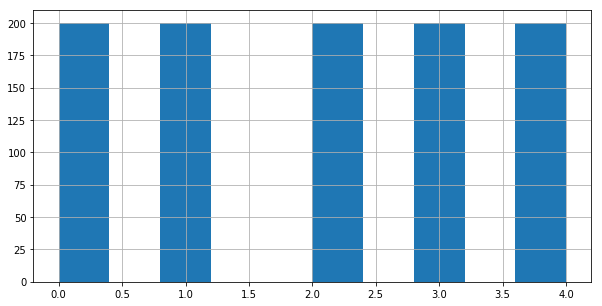

In [18]:
train_df_balance = train.groupby('label').apply(lambda x: x.sample(200, replace = True)).reset_index(drop = True)
print('New Data Size:',train_df_balance .shape[0], 'Old Size:',train.shape[0])
train_df_balance['label'].hist(figsize = (10, 5))

In [19]:
train_X=list(train_df_balance['image'])
train_Y=train_df_balance['label']


In [20]:
train_X=np.array(train_X).reshape(-1,512,512,1)


In [21]:
train_X.shape[1:]

(512, 512, 1)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical


In [26]:
visible = Input(shape=(512,512,1))
conv1 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(visible)
conv2 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv1)
bat1 = BatchNormalization()(conv2)
pool1 = MaxPooling2D(pool_size=(2, 2))(bat1)
zero1 = ZeroPadding2D(padding=(1, 1))(pool1)

conv3 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(zero1)
conv4 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(conv3)
bat2 = BatchNormalization()(conv4)
pool2 = MaxPooling2D(pool_size=(2, 2))(bat2)

conv5 = Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(pool2)
conv6 = Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(conv5)
bat3 = BatchNormalization()(conv6)
pool3 = MaxPooling2D(pool_size=(2, 2))(bat3)
zero2 = ZeroPadding2D(padding=(1, 1))(pool3)

conv7 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01))(zero2)
conv8 = Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid')(conv7)
bat4 = BatchNormalization()(conv8)

conv9 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(bat4)
conv10 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(conv9)
bat5 = BatchNormalization()(conv10)

conv11 = Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1, 1))(bat5)
conv12 = Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv11)
bat6 = BatchNormalization()(conv12)
pool4 = MaxPooling2D(pool_size=(2, 2))(bat6)

conv13 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(pool4)
conv14 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(conv13)
bat7 = BatchNormalization()(conv14)

conv15 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(bat7)
conv16 = Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid')(conv15)
bat8 = BatchNormalization()(conv16)

flat = Flatten()(bat8)
hidden1 = Dense(32, activation='relu')(flat)
drop1 = Dropout(0.3)(hidden1)

hidden2 = Dense(32, activation='relu')(drop1)
drop2 = Dropout(0.2)(hidden2)

output = Dense(5, activation='softmax')(drop2)
model = Model(inputs=visible, outputs=output)

In [27]:
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [28]:
model.compile(optimizer= opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
Callbacks=[EarlyStopping(patience=3, restore_best_weights=True), 
           ReduceLROnPlateau(patience=2), 
           ModelCheckpoint(filepath='ImageDataGen_Size256_gray_Callbacks_SGD_L2.h5', save_best_only=True)]

In [30]:
with tf.device('/device:CPU:0'): 
    m1= model.fit(train_X,to_categorical(train_Y),batch_size=32, epochs = 10, validation_split = 0.1,
            callbacks=Callbacks,
            verbose=1)

Train on 900 samples, validate on 100 samples
Epoch 1/10
 32/900 [>.............................] - ETA: 23:52 - loss: 15.4425 - accuracy: 0.2188

KeyboardInterrupt: 

In [0]:
test_X=[]
test_Y=[]
for i,j in test:
  test_X.append(i)
  test_Y.append(j)


test_X = np.array(test_X).reshape(-1, 512, 512, 1)
test_X = np.float32(test_X)
pred_Y = model.predict(test_X)




In [136]:
pred_Y

array([[0.24998978, 0.4586445 , 0.1805576 , 0.0409137 , 0.06989433],
       [0.21822397, 0.28597382, 0.19200489, 0.17057058, 0.13322671],
       [0.21680722, 0.24383275, 0.26692432, 0.16757591, 0.10485979],
       ...,
       [0.5698174 , 0.2193359 , 0.20064995, 0.00160116, 0.00859557],
       [0.45190468, 0.23142846, 0.2912036 , 0.01205312, 0.01341015],
       [0.25369927, 0.40259033, 0.23093438, 0.06305752, 0.04971853]],
      dtype=float32)

In [0]:

pred_labels = []
for i in range(pred_Y.shape[0]):
  pred_labels.append(np.where(pred_Y[i] == np.amax(pred_Y[i]))[0][0])



In [138]:
np.array(pred_labels)
sum(np.array(test_Y) == pred_labels)/ len(pred_labels)

0.41333333333333333

In [139]:
print(np.array(pred_labels))
print(np.array(test_Y))

[1 1 2 2 1 2 0 0 1 0 0 2 0 0 0 0 1 0 4 0 1 2 0 0 1 1 0 0 2 1 1 0 0 2 2 1 0
 0 1 0 2 0 1 0 0 0 1 0 0 0 0 0 0 2 2 0 0 1 1 1 1 1 0 4 0 2 0 1 1 0 0 2 1 0
 1 1 1 0 1 1 1 0 0 2 0 0 1 0 0 0 0 1 0 2 1 1 0 0 1 0 0 0 1 0 4 0 0 2 1 0 1
 2 1 4 0 2 4 1 1 1 0 1 0 0 1 2 2 0 0 0 0 2 0 2 0 0 0 1 2 0 1 0 1 3 2 0 0 1
 1 1 2 1 2 0 0 0 2 0 0 2 1 0 2 1 1 1 2 2 0 1 0 1 1 2 0 1 1 1 0 1 1 2 2 0 1
 0 2 2 4 1 1 2 1 1 2 2 0 0 1 0 1 0 0 1 2 0 1 1 0 2 0 1 1 1 1 0 0 1 0 1 0 1
 2 1 0 1 1 0 1 0 1 1 1 2 0 2 0 0 0 4 1 1 0 0 1 2 0 2 0 2 1 0 1 0 0 0 1 0 1
 2 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 2 0 1
 0 0 0 1]
[ 0.  0.  0.  0.  0.  0.  2.  2.  0.  2.  3.  0.  0.  0.  0.  0.  2.  0.
  4.  2.  0.  0.  3.  0. nan  1.  0.  0.  0.  0.  1.  0.  0.  0.  2.  0.
  2.  0.  0.  0.  2.  2.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.
  0.  0.  2.  1.  0.  0.  0.  2.  0.  0.  2. nan  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  3.  0.  0.  1.  2.  0.
  0.  0.  0.  0.  0.  0. 